# Dataset

The dataset that we considered for our project is from MovieLens, a recommendation service. For this project, we are using the smaller 100k version dataset, for the sake of simplicity and to reduce computations. It contains 100,836 ratings and 3683 tag applications across 9742 movies. Users were selected at random for inclusion and all the selected users had rated at least 20 movies. The dataset as a whole consisted of movies.csv, tags.csv, ratings.csv and links.csv.

# Data Exploration and Analysis

---


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

## Movies

In [ ]:
# Load movies
movies = pd.read_csv("movies.csv", header=0)
movies = movies.replace({np.nan: None}) 
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
print (f"{len(movies)} movies in total.")

9742 movies in total.


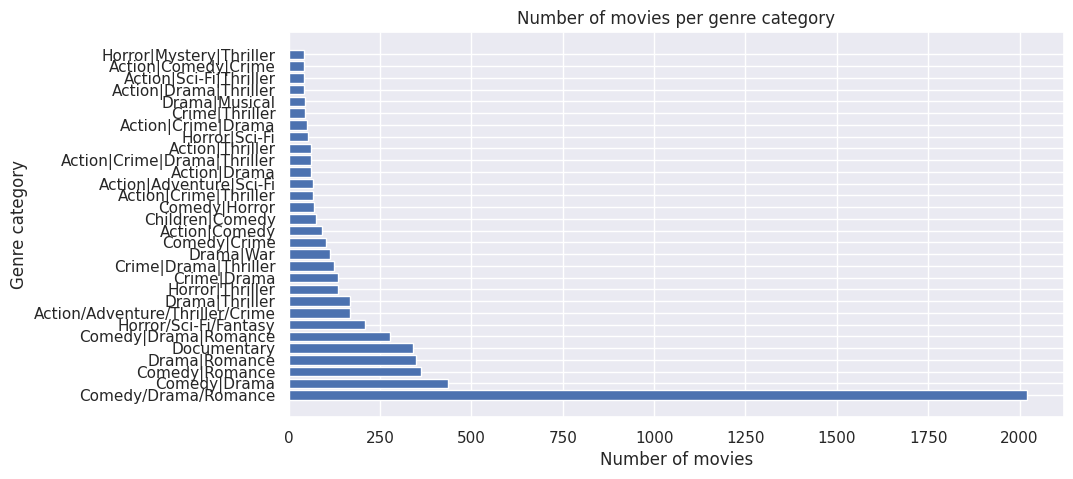

In [ ]:
# Defining a dictionary that maps each genre to its broader category
genre_mapping = {
    'Action': 'Action/Adventure/Thriller/Crime',
    'Adventure': 'Action/Adventure/Thriller/Crime',
    'Thriller': 'Action/Adventure/Thriller/Crime',
    'Crime': 'Action/Adventure/Thriller/Crime',
    'Comedy': 'Comedy/Drama/Romance',
    'Drama': 'Comedy/Drama/Romance',
    'Romance': 'Comedy/Drama/Romance',
    'Horror': 'Horror/Sci-Fi/Fantasy',
    'Sci-Fi': 'Horror/Sci-Fi/Fantasy',
    'Fantasy': 'Horror/Sci-Fi/Fantasy',
    'Documentary': 'Documentary',
    'Animation': 'Animation/Family',
    'Family': 'Animation/Family',
    'Musical': 'Musical',
    'Mystery': 'Mystery',
    'War': 'War',
    'Western': 'Western'
}
all_genres = [s.split(", ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
# Grouping the genres using the mapping dictionary
grouped_genres = {}
for genre in unique_genres:
    if genre in genre_mapping:
        group = genre_mapping[genre]
    else:
        group = genre
    if group not in grouped_genres:
        grouped_genres[group] = 0
    grouped_genres[group] += genres.count(genre)

# Sorting the grouped genres by frequency and plot a bar chart
sorted_genres = sorted(grouped_genres.items(), key=lambda x: x[1], reverse=True)[:30]
plt.figure(figsize=(10, 5))
plt.barh([x[0] for x in sorted_genres], [x[1] for x in sorted_genres])
plt.title("Number of movies per genre category")
plt.xlabel("Number of movies")
plt.ylabel("Genre category")
plt.show()

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Generated a word cloud for movie genres which provided a quick and easy way to visualize the most common or popular genres among a set of movies.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


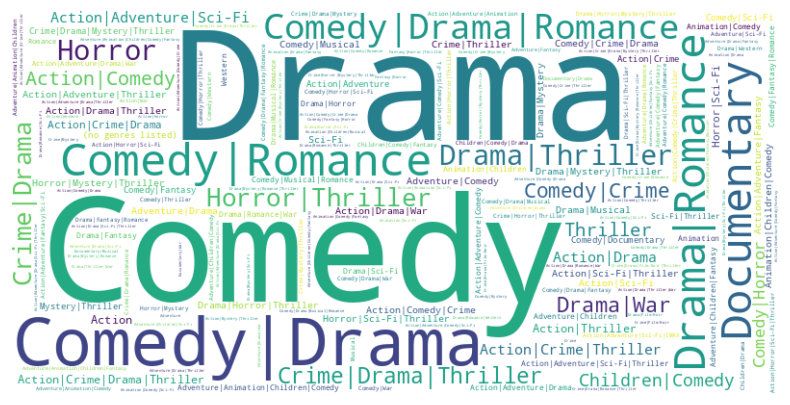

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud

# Creating a frequency table of each genre
genre_counts = pd.Series(genres).value_counts()

# Generating a word cloud of the genre frequencies
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(genre_counts)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Rating

In [ ]:
# Load ratings
ratings = pd.read_csv("ratings.csv", header=0)
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


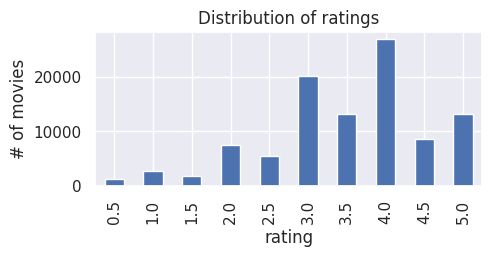

In [ ]:
# Distribution of ratings
print (ratings['rating'].describe())
pd.Series(ratings['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

In [ ]:
sorted_by_users = ratings.groupby('userId')['movieId'].count().sort_values(ascending=False)
print ("Most active users:\n", sorted_by_users.values[:10])

Most active users:
 [2698 2478 2108 1864 1346 1302 1260 1218 1115 1055]


In [ ]:
sorted_by_movies = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)
print ("Most rated movies:\n", sorted_by_movies.values[:10])

Most rated movies:
 [329 317 307 279 278 251 238 237 224 220]


The 'movies' and the 'ratings' tables were merged based on the movieID field and we then added a column for the number of ratings each movie got in order to determine the popularity.

In [ ]:
data = pd.merge(left=movies, right=ratings, on='movieId')
data.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483

Further, we have plotted the ratings and a majority of the movies were rated close 4 stars.

(array([ 1370.,     0.,  2811.,     0.,     0.,  1791.,     0.,     0.,
         7551.,     0.,     0.,  5550.,     0., 20047.,     0.,     0.,
        13136.,     0.,     0., 26818.,     0.,     0.,  8551.,     0.,
        13211.]),
 array([0.5 , 0.68, 0.86, 1.04, 1.22, 1.4 , 1.58, 1.76, 1.94, 2.12, 2.3 ,
        2.48, 2.66, 2.84, 3.02, 3.2 , 3.38, 3.56, 3.74, 3.92, 4.1 , 4.28,
        4.46, 4.64, 4.82, 5.  ]),
 <BarContainer object of 25 artists>)

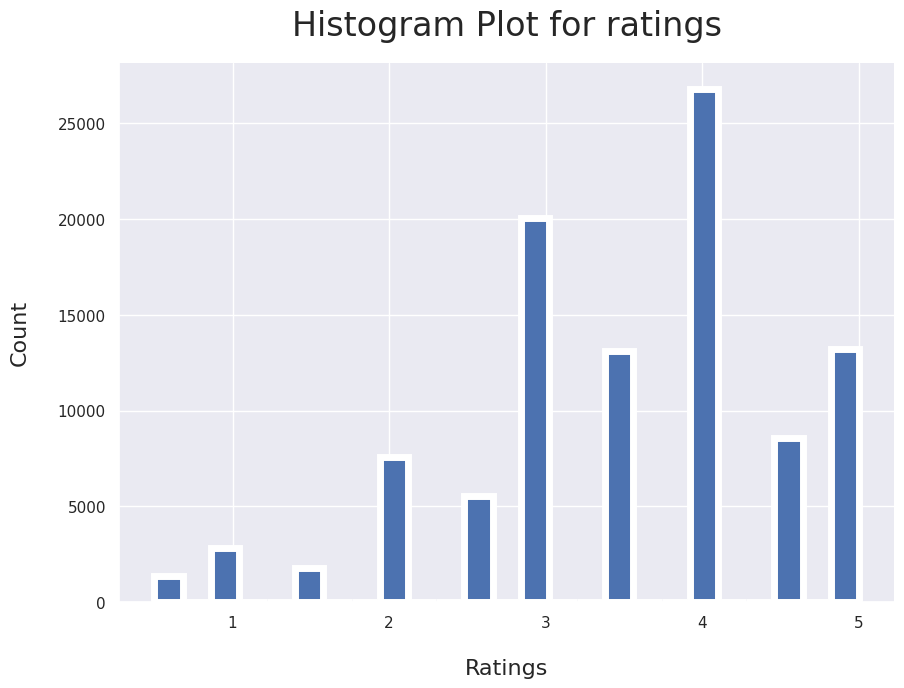

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Histogram Plot for ratings', fontsize=24, pad=20)
ax.set_xlabel('Ratings', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)

plt.hist(data['rating'], bins=25, linewidth=5)

In [ ]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']
genre_df.head()

movieId      Genre
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

As it is evident from the histogram plotted below, a lot of the movies in the dataset were from Drama and comedy genres, although, there were a few from the western and documentary genres too.

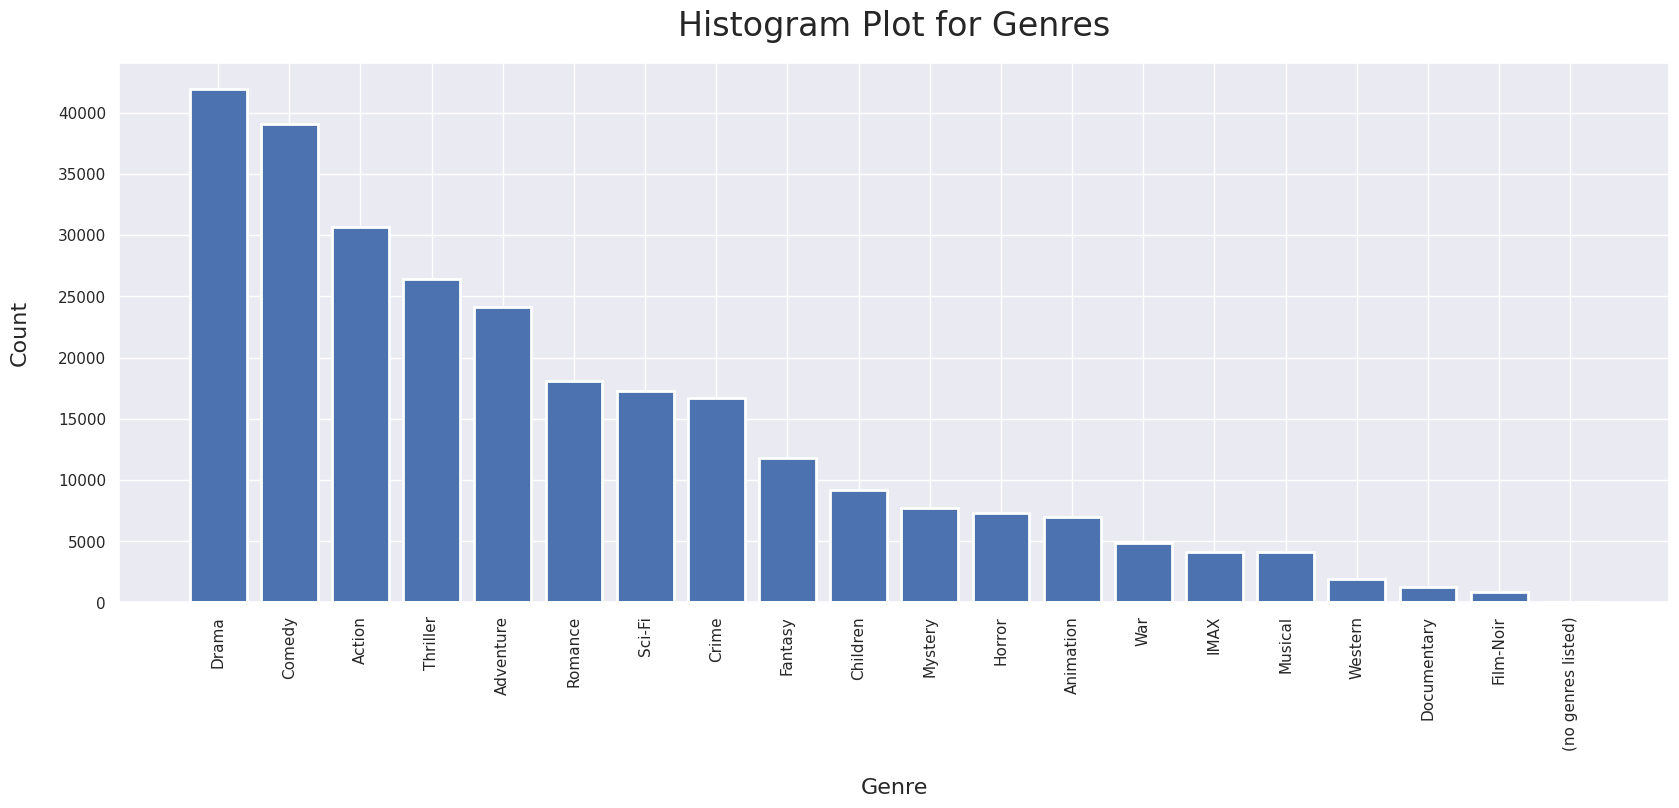

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.set_title('Histogram Plot for Genres', fontsize=24, pad=20)
ax.set_xlabel('Genre', fontsize=16, labelpad=20)
ax.set_ylabel('Count', fontsize=16, labelpad=20)

xs = genre_df['Genre'].value_counts().index
ys = genre_df['Genre'].value_counts().values

plt.bar(x=xs, height=ys, linewidth=2)
plt.xticks(rotation=90)

plt.show()

# Recommendation System

---

## Collaborative Filtering

Collaborative methods for movie recommender systems are techniques that rely solely on past interactions between users and movies to generate new recommendations. These interactions are typically stored in a matrix known as the “user-movie interactions matrix,” where each row represents a user and each column represents a movie.

In [ ]:
user_movie_content = pd.DataFrame(columns=[_ for _ in movies.movieId.unique()], index=[_ for _ in ratings.userId.unique()])
user_movie_content = user_movie_content.replace({np.nan: 0})

In [ ]:
for i in range(ratings.shape[0]):
  user_movie_content.iloc[int(ratings.iloc[i]['userId'])-1][int(ratings.iloc[i]['movieId'])] = ratings.iloc[i]['rating']

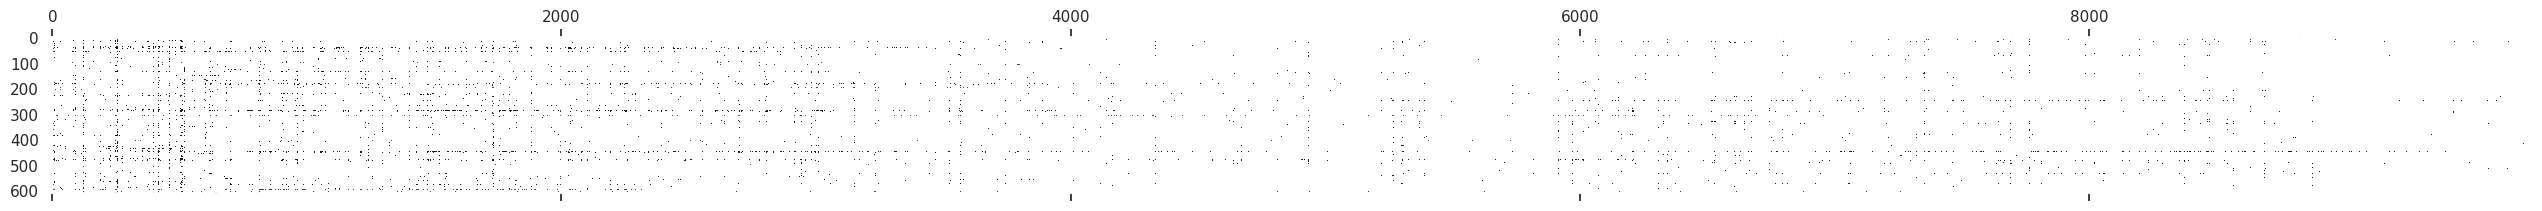

In [ ]:
fig = plt.figure(figsize=(32,32))
plt.spy(user_movie_content)

Plotting heatmap for User and movie interaction matrix.

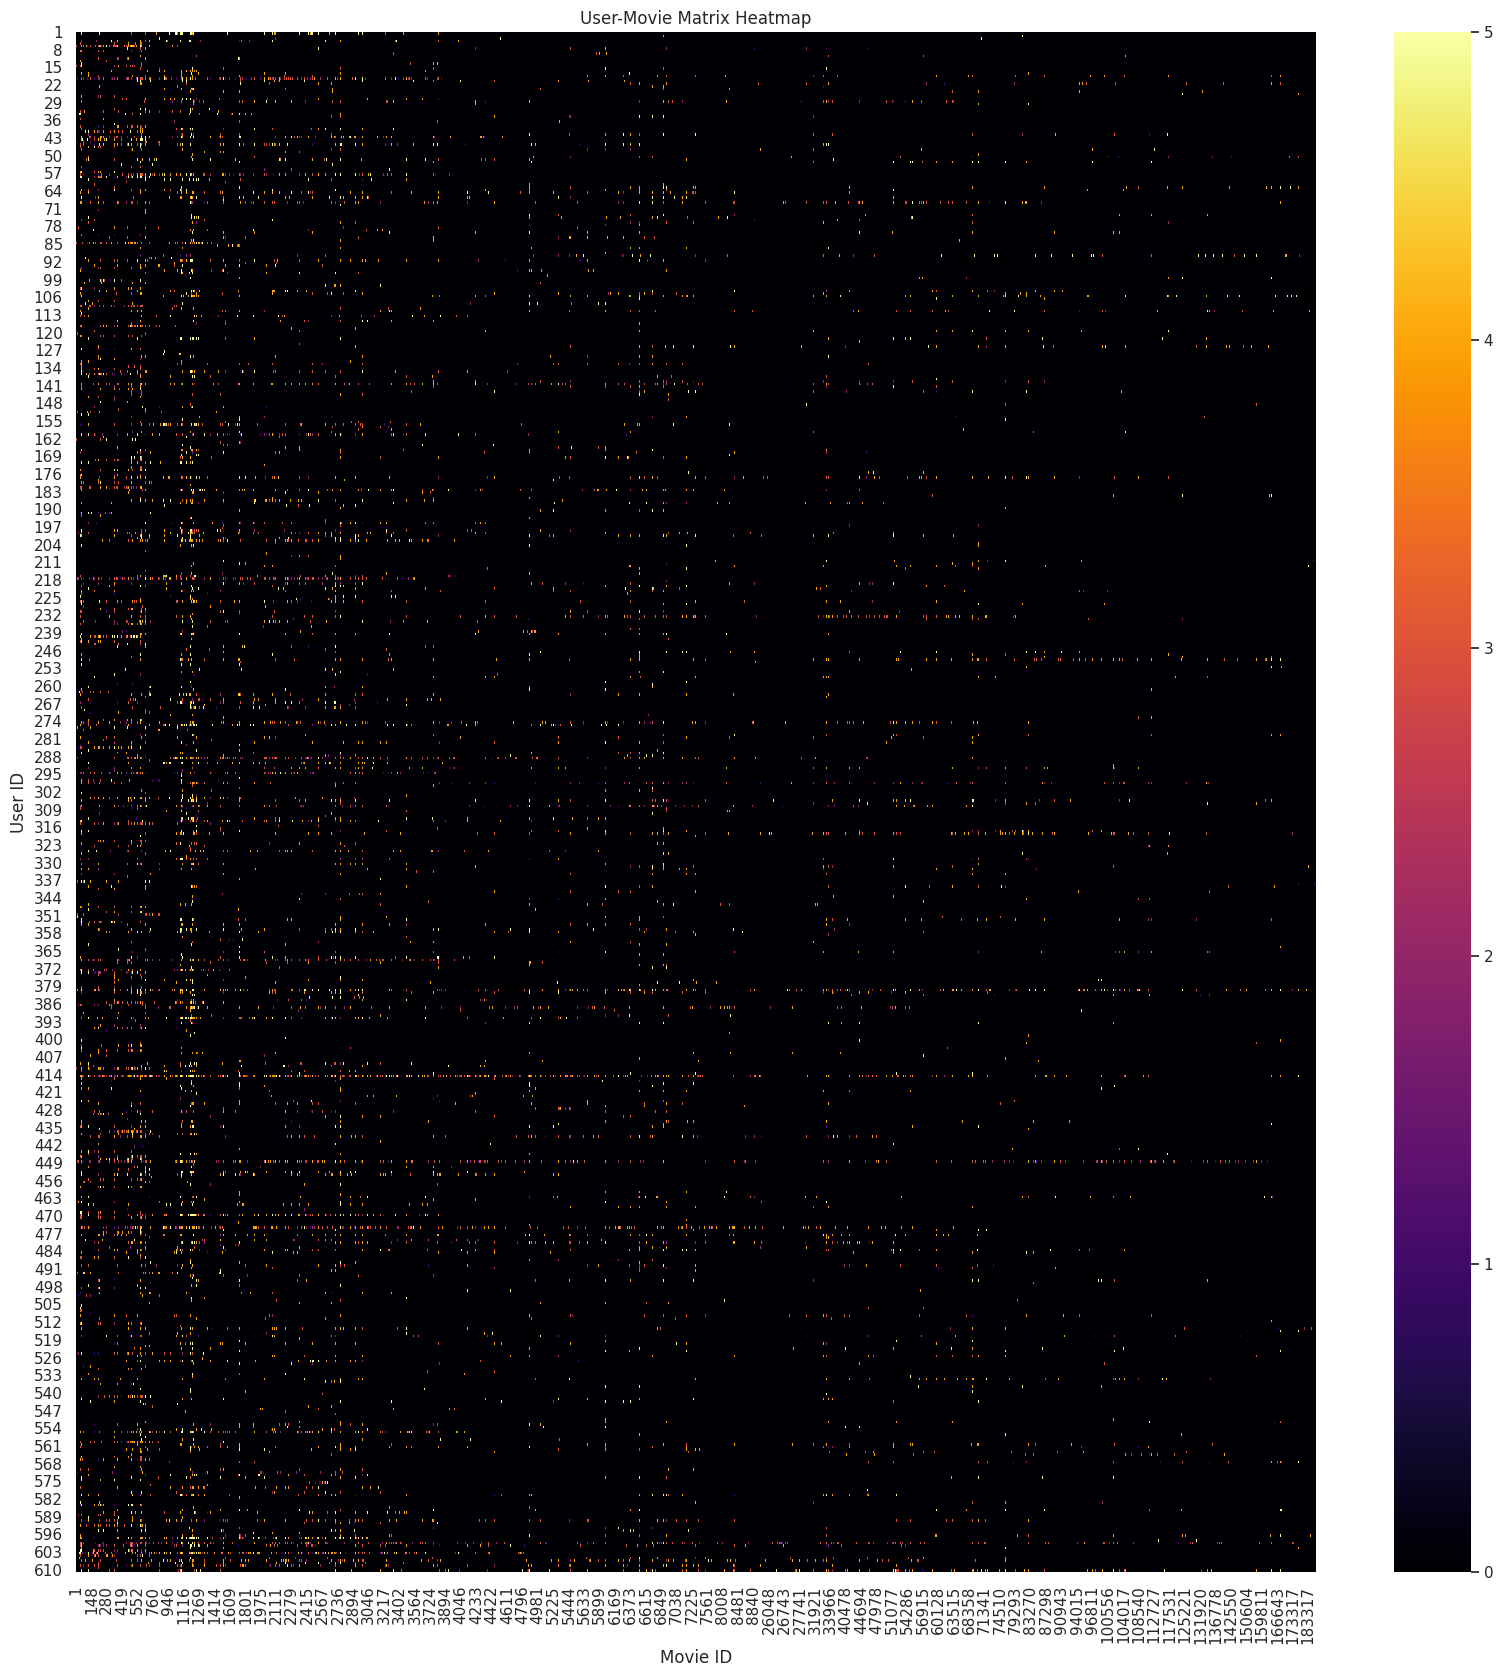

In [ ]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(user_movie_content, cmap='inferno', ax=ax)
plt.title('User-Movie Matrix Heatmap')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

Network graph: We are creating a network graph of the matrix, where each user and movie is represented as a node and each rating is represented as an edge connecting the corresponding nodes. This will help us to identify groups of users or movies that are highly interconnected, and to identify patterns in the overall structure of the matrix.


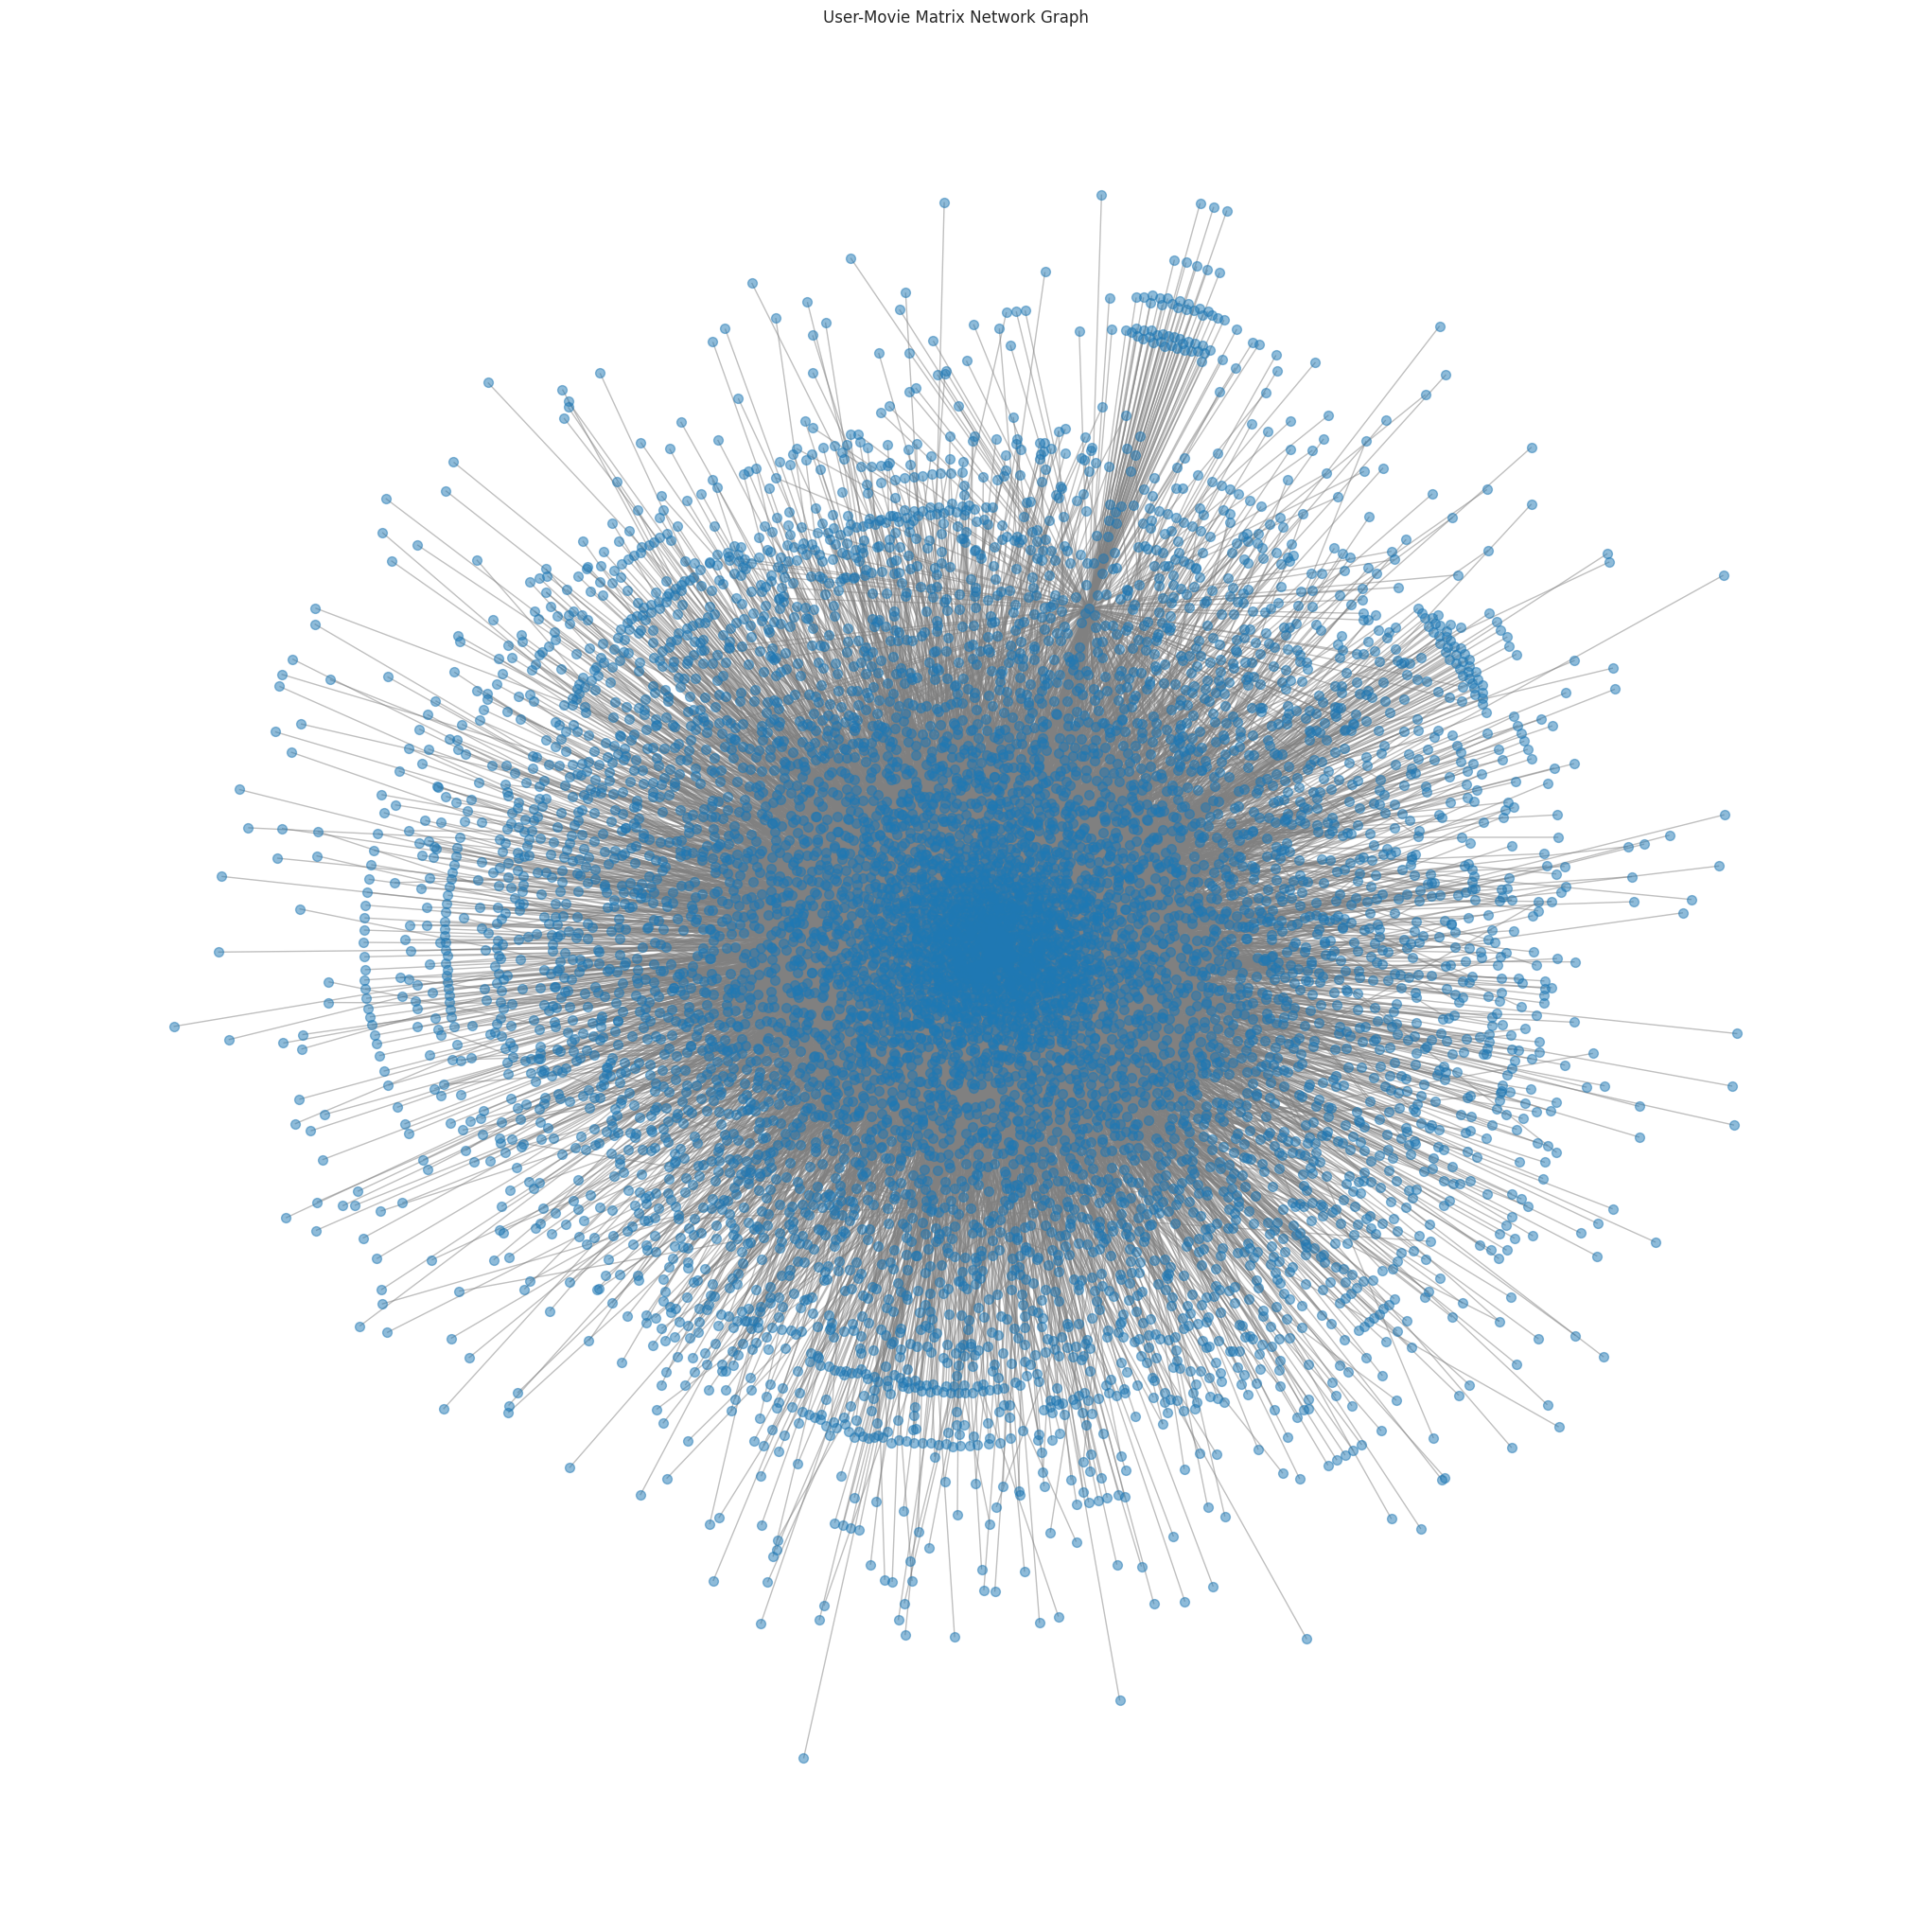

In [ ]:
import networkx as nx

G = nx.Graph()
for u in user_movie_content.index.values:
    for m in user_movie_content.columns.values:
        if user_movie_content.loc[u, m] > 0:
            G.add_edge(u, m, weight=user_movie_content.loc[u, m])

pos = nx.spring_layout(G, k=0.1)
fig = plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_size=50, edge_color='gray', alpha=0.5, with_labels=False)
plt.title('User-Movie Matrix Network Graph')
plt.show()

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Running cross-validation and printing results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


For finding the best possible Model, we tried to calculate the RMSE and MAE Values by comparing Singular Value Decomposition (SVD), Non-negative Matrix Factorization (NMF), CoClustering, SlopeOne. 

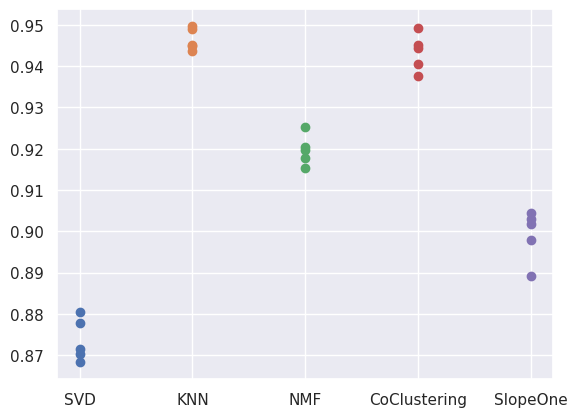

In [ ]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

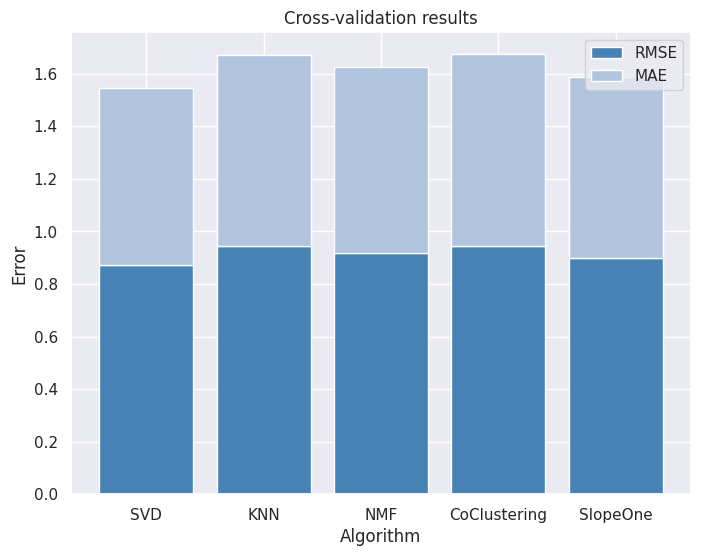

In [ ]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
rmse_scores = [algo1_dict['test_rmse'].mean(), algo2_dict['test_rmse'].mean(), algo3_dict['test_rmse'].mean(), algo4_dict['test_rmse'].mean(), algo5_dict['test_rmse'].mean()]
mae_scores = [algo1_dict['test_mae'].mean(), algo2_dict['test_mae'].mean(), algo3_dict['test_mae'].mean(), algo4_dict['test_mae'].mean(), algo5_dict['test_mae'].mean()]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(algos, rmse_scores, label='RMSE', color='steelblue')
ax.bar(algos, mae_scores, label='MAE', color='lightsteelblue', bottom=rmse_scores)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Error')
ax.set_title('Cross-validation results')
ax.legend()
plt.show()

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):

    # Mapping the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sorting the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Recommending items for each user.

In [ ]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Predicting ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions_collaborative = algo1.test(testset)

top_n = get_top_n(predictions_collaborative, n=10)

# Printing the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [318, 898, 912, 1199, 1250, 1283, 750, 922, 858, 1223]
2 [1204, 2959, 951, 1197, 1242, 1276, 1213, 1228, 4848, 296]
3 [54997, 115713, 2571, 1204, 31658, 1283, 2067, 866, 168252, 3508]
4 [1230, 1278, 1208, 1233, 6377, 5060, 1272, 3429, 1104, 1204]
5 [1136, 68157, 48516, 1193, 3275, 914, 260, 1208, 898, 1204]
6 [741, 1203, 908, 6350, 3275, 541, 44195, 4973, 1197, 56367]
7 [1089, 296, 1201, 318, 1193, 55118, 1276, 89745, 6440, 1235]
8 [1204, 2160, 904, 2324, 1213, 3508, 1196, 1104, 1249, 3147]
9 [296, 1136, 50, 2959, 318, 1196, 8874, 1204, 260, 858]
10 [1204, 4002, 1272, 2194, 3037, 3949, 3435, 899, 1223, 1035]
11 [1204, 750, 858, 1213, 898, 1223, 2019, 1221, 1104, 1252]
12 [50, 110, 260, 296, 356, 593, 1089, 1196, 1198, 1208]
13 [296, 720, 1221, 1204, 1089, 1262, 541, 48516, 7361, 1258]
14 [3435, 1228, 1223, 79132, 142488, 1217, 1204, 105504, 951, 898]
15 [1204, 1272, 1213, 1089, 1203, 177593, 1233, 3508, 3424, 1261]
16 [741, 1262, 1104, 3275, 1245, 898, 1237, 48516, 1303, 3435]
17 [12

# Model Based Approach: Matrix Factorization (SVD)

We used surprise module for simpler calculation of RMSE, MAE values of the model.

In [ ]:
from surprise import accuracy

# Calculating and printing the MAE and RMSE
mae = accuracy.mae(predictions_collaborative)
rmse = accuracy.rmse(predictions_collaborative)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.88
RMSE: 0.67


In [ ]:
print(movies.head())
print(ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from sklearn.model_selection import train_test_split

ratings = pd.read_csv('ratings.csv')
train, test = train_test_split(ratings, test_size=0.2, random_state=42)
reader = Reader(rating_scale=(0.5, 5.0))
traindata = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
testdata = Dataset.load_from_df(test[['userId', 'movieId', 'rating']], reader)

In [ ]:
algo1.fit(traindata.build_full_trainset())
algo2.fit(traindata.build_full_trainset())
algo3.fit(traindata.build_full_trainset())
algo4.fit(traindata.build_full_trainset())
algo5.fit(traindata.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
dd1 = algo1.test(testdata.build_full_trainset().build_testset())
dd2 = algo2.test(testdata.build_full_trainset().build_testset())
dd3 = algo3.test(testdata.build_full_trainset().build_testset())
dd4 = algo4.test(testdata.build_full_trainset().build_testset())
dd5 = algo5.test(testdata.build_full_trainset().build_testset())

In [ ]:
from surprise import accuracy
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def dcg_at_k(scores, k):
    return np.sum(np.divide(np.power(2, scores[:k]) - 1, np.log2(np.arange(2, k + 2))))

def ndcg_at_k(scores, k):
    idcg = dcg_at_k(sorted(scores, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(scores, k) / idcg

def evaluate(algo, trainset, testset):

    algo.fit(trainset)

    # Predicting ratings for the test set
    predictions = algo.test(testset)

    # Computing and printing RMSE and MAE
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')

    fcp = accuracy.fcp(predictions)
    top_n = get_top_n(predictions, n=10)

    # Calculating precision, recall, and F1-score for each user
    precision = []
    recall = []
    f1_score_list = []
    ndcg = []
    for uid, user_ratings in top_n.items():
        ground_truth = defaultdict(float)
        for iid, true_r in trainset.ur[uid]:
            ground_truth[iid] = true_r

        # Getting the recommended items and their predicted ratings for the user
        recommended_items = [iid for (iid, _) in user_ratings]
        predicted_ratings = [algo.predict(uid, iid).est for iid in recommended_items]

        # Calculating precision, recall, and F1-score
        precision.append(precision_score(list(ground_truth.keys()), recommended_items, average='binary'))
        recall.append(recall_score(list(ground_truth.keys()), recommended_items, average='binary'))
        f1_score_list.append(f1_score(list(ground_truth.keys()), recommended_items, average='binary'))
        ndcg.append(ndcg_at_k(predicted_ratings, k=10))

    # Computing the average precision, recall, F1-score, and NDCG across all users
    precision_avg = sum(precision) / len(precision)
    recall_avg = sum(recall) / len(recall)
    f1_score_avg = sum(f1_score_list) / len(f1_score_list)
    ndcg_avg = sum(ndcg) / len(ndcg)
    print(f'Precision: {precision_avg:.2f}')
    print(f'Recall: {recall_avg:.2f}')
    print(f'F1-score: {f1_score_avg:.2f}')
    print(f'NDCG@10: {ndcg_avg:.2f}')

In [ ]:
algo = SVD()
evaluate(algo, trainset, testset)

Precision: 0.68
Recall: 0.41
F1-score: 0.51
NDCG@10: 0.81


In [ ]:
from tabulate import tabulate

data = [['Precision', 0.68],
        ['Recall', 0.41],
        ['F1-score', 0.51],
        ['NDCG@10', 0.81]]
headers = ['Metric', 'Score']

print("Metrics for SVD:")
print(tabulate(data, headers=headers, tablefmt='grid'))

Metrics for SVD:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Precision |    0.68 |
+-----------+---------+
| Recall    |    0.41 |
+-----------+---------+
| F1-score  |    0.51 |
+-----------+---------+
| NDCG@10   |    0.81 |
+-----------+---------+


# Memory Based Approach: KNN

In [ ]:
# trainset = data.build_full_trainset()
algo2.fit(trainset)

# Predicting ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions_collaborative_knn = algo2.test(testset)

top_n = get_top_n(predictions_collaborative_knn, n=10)

# Printing the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Computing the msd similarity matrix...
Done computing similarity matrix.
1 [131724, 5746, 6835, 3851, 1151, 1631, 2075, 176601, 92494, 102217]
2 [3851, 5890, 238, 685, 484, 1105, 1151, 176601, 92494, 102217]
3 [3851, 5890, 685, 1631, 2075, 176601, 92494, 102217, 27523, 67618]
4 [131724, 5746, 6835, 1151, 1631, 2075, 176601, 92494, 102217, 27523]
5 [131724, 5746, 6835, 3851, 5890, 1151, 1631, 2075, 176601, 92494]
6 [131724, 5746, 6835, 3851, 1151, 1631, 2075, 92494, 102217, 67618]
7 [131724, 3851, 1151, 1631, 2075, 176601, 92494, 102217, 27523, 67618]
8 [131724, 5746, 6835, 3851, 5890, 1151, 1631, 2075, 176601, 92494]
9 [3851, 685, 1151, 1631, 1696, 2075, 176601, 92494, 102217, 27523]
10 [131724, 3851, 685, 1105, 1631, 1696, 2075, 176601, 92494, 102217]
11 [131724, 3851, 1151, 1631, 2075, 176601, 92494, 102217, 27523, 67618]
12 [3851, 5890, 1151, 176601, 92494, 102217, 27523, 67618, 8804, 26350]
13 [131724, 3851, 1105, 1151, 1631, 1696, 2075, 176601, 92494, 102217]
14 [131724, 5746, 683

In [ ]:
# Calculating and printing the MAE and RMSE
mae = accuracy.mae(predictions_collaborative_knn)
rmse = accuracy.rmse(predictions_collaborative_knn)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAE: 0.96
RMSE: 0.74


In [ ]:
algo2 = KNNBasic()
evaluate(algo2, trainset, testset)

Precision: 0.55
Recall: 0.38
F1-score: 0.43
NDCG@10: 0.75


In [ ]:
from tabulate import tabulate

data = [['Precision', 0.55],
        ['Recall', 0.38],
        ['F1-score', 0.43],
        ['NDCG@10', 0.75]]
headers = ['Metric', 'Score']
print("Metrics for KNN:")
print(tabulate(data, headers=headers, tablefmt='grid'))

Metrics for KNN:
+-----------+---------+
| Metric    |   Score |
+===========+=========+
| Precision |    0.55 |
+-----------+---------+
| Recall    |    0.38 |
+-----------+---------+
| F1-score  |    0.43 |
+-----------+---------+
| NDCG@10   |    0.75 |
+-----------+---------+


## Content based filtering

Content-based filtering is a type of recommendation system that relies on the content or features of the items being recommended. In this approach, the recommendation problem is transformed into either a classification or regression problem, depending on whether we are predicting whether a user likes an item or the rating given by a user to an item. 

In [ ]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [ ]:
print(movies.shape)
movies.drop_duplicates(inplace=True)
movies.drop_duplicates(['movieId'], inplace=True)
print(movies.shape)

(9742, 3)
(9742, 3)


In [ ]:
movie_profile = movies[['movieId', 'title', 'genres']]
movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0

<ipython-input-69-4f9ca9deb634>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_profile[genre] = 0
<ipython-input-69-4f9ca9deb634>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_profile[genre] = 0
<ipython-input-69-4f9ca9deb634>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  movie_pr

In [ ]:
movie_profile.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

   Adventure|Children|Drama|Fantasy|IMAX  Drama|Fantasy|Romance|Thriller  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   

   Comedy|Drama|Romance|Sci-Fi  Action|Drama|Mystery|Thriller  Comedy|Horror  \
0                            0                              0              0   
1                            0                              0              0   
2                            0                              0              0   
3                            0                              0              0   
4                            0                              0              0   

   Crime|Drama|Western  Action|Adventure|Horror|Sci-Fi|Thriller  ...  \
0                    0                                        0  ...   
1                    0                                        0  ...   
2                    0                                        0  ...   
3                    0                                        0  ...   
4                    0                                        0  ...   

   Crime|Drama|Horror|Thriller  Adventure|Animation|Drama|Fantasy|Sci-Fi  \
0                            0                                         0   
1                            0                                         0   
2                            0                                         0   
3                            0                                         0   
4                            0                                         0   

   Crime|Romance|Thriller  Comedy  Action|Adventure|Animation|Fantasy|IMAX  \
0                       0       0                                        0   
1                       0       0                                        0   
2                       0       0                                        0   
3                       0       0                                        0   
4                       0       0                                        0   

   Action|Animation|Mystery|Sci-Fi  Comedy|Drama|Mystery|Thriller  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   Adventure|Documentary|Western  Comedy|Drama|Musical|IMAX  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Adventure|Drama|War|Western  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 954 columns]

In [ ]:
for i in range(len(movie_profile)):
  if type(movie_profile['genres'].iloc[i]) != None.__class__:
    Genres = movie_profile.iloc[i].genres.split(', ')
    for g in Genres:
      movie_profile[g].iloc[i] = 1

<ipython-input-71-9e24e93bbf9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_profile[g].iloc[i] = 1


In [ ]:
movie_profile.tail()

movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  Adventure|Children|Drama|Fantasy|IMAX  \
9737  Action|Animation|Comedy|Fantasy                                      0   
9738         Animation|Comedy|Fantasy                                      0   
9739                            Drama                                      0   
9740                 Action|Animation                                      0   
9741                           Comedy                                      0   

      Drama|Fantasy|Romance|Thriller  Comedy|Drama|Romance|Sci-Fi  \
9737                               0                            0   
9738                               0                            0   
9739                               0                            0   
9740                               0                            0   
9741                               0                            0   

      Action|Drama|Mystery|Thriller  Comedy|Horror  Crime|Drama|Western  \
9737                              0              0                    0   
9738                              0              0                    0   
9739                              0              0                    0   
9740                              0              0                    0   
9741                              0              0                    0   

      Action|Adventure|Horror|Sci-Fi|Thriller  ...  \
9737                                        0  ...   
9738                                        0  ...   
9739                                        0  ...   
9740                                        0  ...   
9741                                        0  ...   

      Crime|Drama|Horror|Thriller  Adventure|Animation|Drama|Fantasy|Sci-Fi  \
9737                            0                                         0   
9738                            0                                         0   
9739                            0                                         0   
9740                            0                                         0   
9741                            0                                         0   

      Crime|Romance|Thriller  Comedy  Action|Adventure|Animation|Fantasy|IMAX  \
9737                       0       0                                        0   
9738                       0       0                                        0   
9739                       0       0                                        0   
9740                       0       0                                        0   
9741                       0       1                                        0   

      Action|Animation|Mystery|Sci-Fi  Comedy|Drama|Mystery|Thriller  \
9737                                0                              0   
9738                                0                              0   
9739                                0                              0   
9740                                0                              0   
9741                                0                              0   

      Adventure|Documentary|Western  Comedy|Drama|Musical|IMAX  \
9737                              0                          0   
9738                              0                          0   
9739                              0                          0   
9740                              0                          0   
9741                              0                          0   

      Adventure|Drama|War|Western  
9737                            0  
9738                            0  
9739                            0  
9740                            0  
9

In [ ]:
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')

In [ ]:
user_x_movie = pd.pivot_table(ratings, values='rating', index=['movieId'], columns = ['userId'])

In [ ]:
movie_profile.sort_index(axis=0, inplace=True)
movie_profile.head()

Adventure|Children|Drama|Fantasy|IMAX  \
movieId                                          
1                                            0   
2                                            0   
3                                            0   
4                                            0   
5                                            0   

         Drama|Fantasy|Romance|Thriller  Comedy|Drama|Romance|Sci-Fi  \
movieId                                                                
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   
5                                     0                            0   

         Action|Drama|Mystery|Thriller  Comedy|Horror  Crime|Drama|Western  \
movieId                                                                      
1                                    0              0                    0   
2                                    0              0                    0   
3                                    0              0                    0   
4                                    0              0                    0   
5                                    0              0                    0   

         Action|Adventure|Horror|Sci-Fi|Thriller  Action|Drama|Sci-Fi|IMAX  \
movieId                                                                      
1                                              0                         0   
2                                              0                         0   
3                                              0                         0   
4                                              0                         0   
5                                              0                         0   

         Adventure|Animation|Comedy|Fantasy|Musical|Romance  \
movieId                                                       
1                                                        0    
2                                                        0    
3                                                        0    
4                                                        0    
5                                                        0    

         Film-Noir|Mystery|Thriller  ...  Crime|Drama|Horror|Thriller  \
movieId                              ...                                
1                                 0  ...                            0   
2                                 0  ...                            0   
3                                 0  ...                            0   
4                                 0  ...                            0   
5                                 0  ...                            0   

         Adventure|Animation|Drama|Fantasy|Sci-Fi  Crime|Romance|Thriller  \
movieId                                                                     
1                                               0                       0   
2                                               0                       0   
3                                               0                       0   
4                                               0                       0   
5                                               0                       0   

         Comedy  Action|Adventure|Animation|Fantasy|IMAX  \
movieId                                                    
1             0                                        0   
2             0                                        0   
3             0                                        0   
4             0                                        0   
5             1                                        0   

         Action|Animation|Mystery|Sci-Fi  Comedy|Drama|Mystery|Thriller  \
movieId                                                              

In [ ]:
user_x_movie.sort_index(axis=0, inplace=True)
user_x_movie

userId   1    2    3    4    5    6    7    8    9    10   ...  601  602  603  \
movieId                                                    ...                  
1        4.0  NaN  NaN  NaN  4.0  NaN  4.5  NaN  NaN  NaN  ...  4.0  NaN  4.0   
2        NaN  NaN  NaN  NaN  NaN  4.0  NaN  4.0  NaN  NaN  ...  NaN  4.0  NaN   
3        4.0  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4        NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
5        NaN  NaN  NaN  NaN  NaN  5.0  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

userId   604  605  606  607  608  609  610  
movieId                                     
1        3.0  4.0  2.5  4.0  2.5  3.0  5.0  
2        5.0  3.5  NaN  NaN  2.0  NaN  NaN  
3        NaN  NaN  NaN  NaN  2.0  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        3.0  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  
193581   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193583   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193585   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193587   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
193609   NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[9724 rows x 610 columns]

In [ ]:
from tqdm import tqdm

userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = movie_profile.mul(user_x_movie.iloc[:,i], axis=0)   
  user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

100%|██████████| 610/610 [02:37<00:00,  3.87it/s]


In [ ]:
user_profile

Adventure|Children|Drama|Fantasy|IMAX  Drama|Fantasy|Romance|Thriller  \
1                                 0.000000                             0.0   
2                                 0.000000                             0.0   
3                                 0.000000                             0.0   
4                                 0.000000                             0.0   
5                                 0.000000                             0.0   
..                                     ...                             ...   
606                               0.000000                             0.0   
607                               0.000000                             0.0   
608                               0.000000                             0.0   
609                               0.000000                             0.0   
610                               0.003072                             0.0   

     Comedy|Drama|Romance|Sci-Fi  Action|Drama|Mystery|Thriller  \
1                       0.000000                            0.0   
2                       0.000000                            0.0   
3                       0.000000                            0.0   
4                       0.000000                            0.0   
5                       0.000000                            0.0   
..                           ...                            ...   
606                     0.000000                            0.0   
607                     0.000000                            0.0   
608                     0.000000                            0.0   
609                     0.000000                            0.0   
610                     0.002304                            0.0   

     Comedy|Horror  Crime|Drama|Western  \
1         0.000000             0.000000   
2         0.000000             0.000000   
3         0.128205             0.000000   
4         0.000000             0.000000   
5         0.000000             0.000000   
..             ...                  ...   
606       0.000000             0.000000   
607       0.058824             0.000000   
608       0.025271             0.000000   
609       0.000000             0.000000   
610       0.041091             0.003072   

     Action|Adventure|Horror|Sci-Fi|Thriller  Action|Drama|Sci-Fi|IMAX  \
1                                   0.000000                  0.000000   
2                                   0.000000                  0.000000   
3                                   0.000000                  0.000000   
4                                   0.000000                  0.000000   
5                                   0.000000                  0.000000   
..                                       ...                       ...   
606                                 0.000000                  0.000000   
607                                 0.000000                  0.000000   
608                                 0.000000                  0.000000   
609                                 0.000000                  0.000000   
610                                 0.002688                  0.002688   

     Adventure|Animation|Comedy|Fantasy|Musical|Romance  \
1                                                  0.0    
2                                                  0.0    
3                                                  0.0    
4                                                  0.0    
5                                                  0.0    
..                                                 ...    
606                                                0.0    
607                                                0.0    
608                                                0.0    
609                                                0.0    
610                                                0.0    

     Film-Noir|Mystery|Thriller  ...  Crime|Drama|Horror|Thriller  \
1                      0.000000  ...                     0.000000   
2         

### TF/IDF

To implement a content-filtering recommendation system, We utilized TFIDF to reflect the importance of each genre in any movie. And then We calculated the sum product of the importance weights and users’ preferences towards different genres (given in user profile). Based on the sum-product, we could simply sort movies and suggest the users the top N candidates as the recommendations.

In [79]:
df = movie_profile.sum()
idf = (len(movies)/df).apply(np.log) 

In [80]:
df

Adventure|Children|Drama|Fantasy|IMAX     2
Drama|Fantasy|Romance|Thriller            1
Comedy|Drama|Romance|Sci-Fi               2
Action|Drama|Mystery|Thriller             1
Comedy|Horror                            69
                                         ..
Action|Animation|Mystery|Sci-Fi           1
Comedy|Drama|Mystery|Thriller             1
Adventure|Documentary|Western             1
Comedy|Drama|Musical|IMAX                 1
Adventure|Drama|War|Western               2
Length: 951, dtype: int64

In [81]:
idf

Adventure|Children|Drama|Fantasy|IMAX    8.491055
Drama|Fantasy|Romance|Thriller           9.184202
Comedy|Drama|Romance|Sci-Fi              8.491055
Action|Drama|Mystery|Thriller            9.184202
Comedy|Horror                            4.950095
                                           ...   
Action|Animation|Mystery|Sci-Fi          9.184202
Comedy|Drama|Mystery|Thriller            9.184202
Adventure|Documentary|Western            9.184202
Comedy|Drama|Musical|IMAX                9.184202
Adventure|Drama|War|Western              8.491055
Length: 951, dtype: float64

In [82]:
TFIDF = movie_profile.mul(idf.values)
TFIDF

Adventure|Children|Drama|Fantasy|IMAX  \
movieId                                          
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
5                                          0.0   
...                                        ...   
193581                                     0.0   
193583                                     0.0   
193585                                     0.0   
193587                                     0.0   
193609                                     0.0   

         Drama|Fantasy|Romance|Thriller  Comedy|Drama|Romance|Sci-Fi  \
movieId                                                                
1                                   0.0                          0.0   
2                                   0.0                          0.0   
3                                   0.0                          0.0   
4                                   0.0                          0.0   
5                                   0.0                          0.0   
...                                 ...                          ...   
193581                              0.0                          0.0   
193583                              0.0                          0.0   
193585                              0.0                          0.0   
193587                              0.0                          0.0   
193609                              0.0                          0.0   

         Action|Drama|Mystery|Thriller  Comedy|Horror  Crime|Drama|Western  \
movieId                                                                      
1                                  0.0            0.0                  0.0   
2                                  0.0            0.0                  0.0   
3                                  0.0            0.0                  0.0   
4                                  0.0            0.0                  0.0   
5                                  0.0            0.0                  0.0   
...                                ...            ...                  ...   
193581                             0.0            0.0                  0.0   
193583                             0.0            0.0                  0.0   
193585                             0.0            0.0                  0.0   
193587                             0.0            0.0                  0.0   
193609                             0.0            0.0                  0.0   

         Action|Adventure|Horror|Sci-Fi|Thriller  Action|Drama|Sci-Fi|IMAX  \
movieId                                                                      
1                                            0.0                       0.0   
2                                            0.0                       0.0   
3                                            0.0                       0.0   
4                                            0.0                       0.0   
5                                            0.0                       0.0   
...                                          ...                       ...   
193581                                       0.0                       0.0   
193583                                       0.0                       0.0   
193585                                       0.0                       0.0   
193587                                       0.0                       0.0   
193609                                       0.0                       0.0   

         Adventure|Animation|Comedy|Fantasy|Musical|Romance  \
movieId                                                       
1                                                      0.0    
2                                                      0.0    
3                                                      0.0    
4                                                      0.0    
5            

In [83]:
df_predict = pd.DataFrame()

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1) 

 16%|█▋        | 100/610 [00:12<00:59,  8.50it/s]<ipython-input-83-61b5c6eba44f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)
 17%|█▋        | 101/610 [00:12<01:00,  8.41it/s]<ipython-input-83-61b5c6eba44f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)
 17%|█▋        | 102/610 [00:12<00:59,  8.52it/s]<ipython-input-83-61b5c6eba44f>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually

In [84]:
df_predict

1         2         3         4         5         6         7    \
movieId                                                                         
1        0.114125  0.000000  0.000000  0.000000  0.601750  0.000000  0.566120   
2        0.284774  0.000000  0.000000  0.139031  0.000000  0.210406  0.158057   
3        0.226883  0.000000  0.042177  0.380764  0.598145  0.607670  0.259721   
4        0.000000  0.000000  0.091380  0.824954  0.728959  0.499386  0.222738   
5        0.472423  1.045361  0.000000  0.863689  0.158997  0.802075  0.191773   
...           ...       ...       ...       ...       ...       ...       ...   
193581   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
193583   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
193585   0.095897  0.690456  0.114092  0.803401  0.606765  0.765219  0.402514   
193587   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
193609   0.472423  1.045361  0.000000  0.863689  0.158997  0.802075  0.191773   

              8         9         10   ...       601       602       603  \
movieId                                ...                                 
1        0.000000  0.000000  0.000000  ...  0.819214  0.000000  0.028077   
2        0.511162  0.000000  0.000000  ...  0.000000  0.177960  0.000000   
3        1.679897  0.000000  1.997378  ...  0.260578  0.657960  0.415150   
4        0.530779  0.697265  1.756445  ...  0.000000  0.395978  0.468623   
5        0.148848  0.912506  0.308152  ...  0.092355  0.380023  0.502002   
...           ...       ...       ...  ...       ...       ...       ...   
193581   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
193583   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
193585   0.142009  0.580383  0.301938  ...  0.660833  0.692161  1.356587   
193587   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
193609   0.148848  0.912506  0.308152  ...  0.092355  0.380023  0.502002   

              604       605       606       607       608       609       610  
movieId                                                                        
1        0.198578  0.314489  0.038588  0.247779  0.135412  0.536696  0.106762  
2        0.540553  0.502777  0.061947  0.000000  0.057821  0.000000  0.036904  
3        0.493470  0.312605  0.628455  0.123148  0.269201  0.266740  0.152867  
4        0.106914  0.161258  0.727143  0.247751  0.218717  0.288957  0.254557  
5        0.466392  0.163554  0.451752  0.261878  0.526164  0.189078  0.344779  
...           ...       ...       ...       ...       ...       ...       ...  
193581   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
193583   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
193585   0.689689  0.065435  1.279012  0.463996  0.307885  0.601298  0.288780  
193587   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
193609   0.466392  0.163554  0.451752  0.261878  0.526164  0.189078  0.344779  

[9742 rows x 610 columns]

In [85]:
rmse = []

for i in range(user_x_movie.shape[0]):
  for j in range(user_x_movie.shape[1]):
    if pd.isna(user_x_movie.iloc[i, j]) is not True:
      rmse.append(user_x_movie.iloc[i, j] - df_predict.iloc[i, j])


In [86]:
print('RMSE of content-based recommendation system is: ', np.sqrt(np.mean([_**2 for _ in rmse])) / 5)

RMSE of content-based recommendation system is:  0.6792754204203908


In [87]:
def recommender(user_no):
  
  user_predicted_rating = df_predict[df_predict.columns[user_no - 1]]
  user_rating_film = pd.merge(user_predicted_rating, movies, left_on='movieId', right_on='movieId')
  already_watched = ratings[ratings['userId'].isin([user_no])]['movieId']
  all_rec = user_rating_film[~user_rating_film.index.isin(already_watched)]
  
  return all_rec.sort_values(by=[user_no], ascending=False).iloc[0:10][['movieId', 'title']]

These are the top 10 recommendations for the user.

In [88]:
recommender(1)

movieId                                           title
8458   112370          Transformers: Age of Extinction (2014)
2889     3864  Godzilla 2000 (Gojira ni-sen mireniamu) (1999)
4425     6537       Terminator 3: Rise of the Machines (2003)
1058     1375      Star Trek III: The Search for Spock (1984)
6825    61210                        Mutant Chronicles (2008)
5787    31553                            Double Dragon (1994)
8697   122922                           Doctor Strange (2016)
8425   111362               X-Men: Days of Future Past (2014)
1989     2643         Superman IV: The Quest for Peace (1987)
5330     8865    Sky Captain and the World of Tomorrow (2004)